### Part 1

implement the single lane, variable speed traffic model described in this paper: Nagel, K., Schreckenberg, M. (1992). A cellular automaton model for freeway traffic. Journal de Physique I, 2(12), 2221–2229.

In [76]:
import random as rd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
class TrafficSimulator:
    
    def __init__(self, road_len, p_car, v_max, p_slow, verbose = True ):
        """
        Initialize traffic simulation:
        road_lend: length of the road (circumference)
        p_car: car density
        v_max: maximum speed
        p_slow: probability of slowing down 1 speed unit
        verbose: whether we want to display the states
        """      
        self.road_len = road_len
        self.v_max = v_max
        self.p_slow = p_slow
        self.verbose = verbose        
        self.state= sc.zeros([road_len], int)
        
        for i in range(road_len):
            if rd.random() < p_car:
                # All cars start at full speed
                self.state[i] = self.v_max                
            else:
                self.state[i] = -1
        
    def display(self):
        """
        Method for visualizing the state of the model
        """     
        print(''.join('.' if x == -1 else str(x) for x in self.state))
        
    def update(self):
        """
        Advances the simulation 1 timestep forward by doing the following on all cars:
         - Increase speed +1 if v smaller than v_max and distance to next vehicle > v+1
         - if distance to next car < v, slow down to d-1.
         - If speed > 0, randomly decrease speed by 1.
         - Display
         - Advance all cars v steps.
        """      
        flow = 0     
        
        for i, v in enumerate(self.state):
            if v >= 0:
                #get distance to next car
                d = 1
                while self.state[(i + d) % self.road_len] == -1 and d <= self.v_max+1:
                    d += 1
                #update speeds
                if d > v + 1:
                    self.state[i] = min(self.state[i] + 1, self.v_max)
                else:
                    self.state[i] = d - 1
                if self.state[i] > 0 and rd.random() < self.p_slow:
                    self.state[i] -= 1
                #Count flow
                if i + v > self.road_len: flow += 1
                        
        #We display before moving the cars
        if self.verbose: self.display()    
                
        prev_state = self.state[:]
        i = 0
        while i < len(prev_state):
            v = prev_state[i]
            if v >= 0:
                self.state[i] = -1
                i += v
                self.state[i % self.road_len] = v
                i += 1
            else: 
                i+=1 
        return flow
    
    def run(self, n_steps = 100):
        flow_sum = 0.0
        for step in range(n_steps):
            flow_sum += self.update()
        return flow_sum / n_steps

In [43]:
## Example flow with  no traffic jams (low density)
a = TrafficSimulator(road_len=100, p_car=.07, v_max=5, p_slow=.5)
a.run(20)

.......................................1..1.5....................4.................4.............5..
..5.....................................2..1.....5...................5.................5............
.......4..................................1.1.........5...................5.................4.......
...........4...............................0.2.............4...................5................5...
.4.............4...........................0...2...............4....................4...............
.....5.............5.......................1.....3.................5....................5...........
..........4.............5...................2.......3...................4....................5......
..............5..............5................3........4....................5.....................4.
..5................4..............4..............3.........4.....................5..................
.......5...............5..............5.............3..........4......................5....

0.2

In [15]:
## Example flow with traffic jams (high density)
a = TrafficSimulator(road_len=100, p_car=.4, v_max=5, p_slow=.5)
a.run(20)

00000.00.1.002..04......1.3...01..000.0.1.000003....001.00.04......001.2..0.4....2...4.............0
00000.00..001..01....2...2...01.0.000.1..000001...1.00.001.1....1..00.1..01.....1..3.....5.........0
00001.00..01.0.0.1.....3...0.1.01.001..1.00000.2...000.00.0.1....0.00..0.1.1.....1....4.......3....0
0001.000..1.01.1..1.......00..01.001.2..000001...0.000.00.0..1...1.00..1..0.2.....1.......5......0.0
001.0001...01.1.2..2......00..1.000.2..000001.2..0.000.01.0...1...000...1.1...2....1...........1.1.0
00.0001.2..0.0.2..1..2....00...0001...000000.1..00.001.0.00....1..001....1.2....3...1...........1.00
01.000.1..00.1...1.1...1..00...001.1..000001..1.00.00.00.00.....0.00.2....1..2.....0.1...........000
0.0000..1.00..2...0.1...0.00...01.0.0.00000.1..001.01.00.00.....0.00...2...1...3...1..2..........000
1.0001...000....0.0..2..0.01...1.01.0.00001..0.00.01.001.01.....0.00.....2..1.....1.1...2........000
.0001.2..000....0.0....00.1.2...01.01.0000.0.1.01.0.000.01.1....0.00.......0.1.....0.1....2

0.05

In [14]:
## Example flow with traffic jams (high density)
a = TrafficSimulator(road_len=100, p_car=.8, v_max=5, p_slow=.5)
a.run(20)

00.0000000000000000.000.001.000000000000.01.00000000000000001.000000000.001.001.1.0000.00000.001.1.0
01.0000000000000000.001.00.0000000000000.0.00000000000000000.0000000001.00.000.1.00000.00000.01.0.00
1.00000000000000001.00.000.0000000000001.1.00000000000000001.000000000.000.001..000000.00001.1.01.00
.00000000000000001.001.001.000000000000.0.00000000000000000.0000000000.000.00.0.000001.0000.0.01.000
.0000000000000001.001.000.0000000000000.0.00000000000000000.0000000000.000.00.0.00001.00001.1.1.0001
0000000000000000.001.0000.0000000000000.1.00000000000000000.0000000001.000.00.1.0001.00001.1.0.0001.
0000000000000000.00.00000.0000000000000..000000000000000001.000000000.0001.00..0000.00001.1.00.001.0
0000000000000000.00.00001.0000000000000..00000000000000000.0000000000.000.001..0001.0000.0.000.01.00
0000000000000000.00.0000.00000000000001..00000000000000000.0000000000.000.01.0.000.00000.0.000.1.000
0000000000000001.00.0000.0000000000001.1.00000000000000001.0000000001.000.1.01.001.00001.1.

0.1

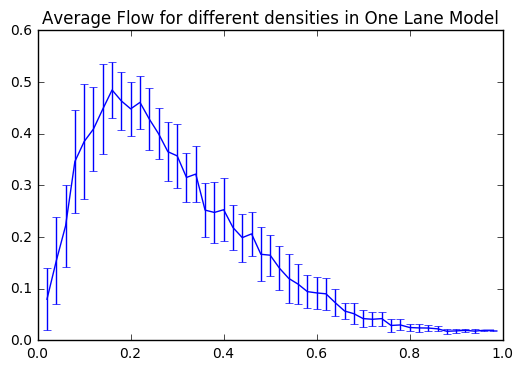

In [155]:
densities = sc.arange(0.02,1,.02)
flow = [ [TrafficSimulator(100, d, 5, .1, verbose = False).run(n_steps = 200)  for i in range(20) ] for d in densities]
plt.errorbar(densities, [np.mean(this_flow) for this_flow in flow], [np.std(this_flow) for this_flow in flow] )
plt.title("Average Flow for different densities in One Lane Model")
plt.show()

### Part 2: Multiple lanes

Implement the 2-lane, symmetric, uni-directional, variable speed model in this paper: Rickert, M., et al. (1996). Two Lane Traffic Simulations using Cellular Automata. Physica A: Statistical Mechanics and its Applications, 231(4), 534–550.

Here I made a class to create simulations with any number of lanes larger than 1. The 2 lane case follows the rules from Rickert et al. For any number of lanes larger than 2 the lanes that are not in the middle follow the same rules to switch lanes, first trying to change to the right, and if this is not possible they then try to switch to the left lane. Here lanes are changed sequentially rather than in parallel to avoid collisions (the case when a car in lane 0 and a car in lane 2 both want the same spot in lane 1).


In [137]:
class NLaneTrafficSimulator:
    
    def __init__(self, road_len, p_car, v_max, p_slow, p_change = 1, n_lanes = 3 ,verbose = True ):
        """
        Initialize traffic simulation:
        road_lend: length of the road (circumference)
        p_car: car density
        v_max: maximum speed
        p_slow: probability of slowing down 1 speed unit
        verbose: whether we want to display the states
        """      
        self.road_len = road_len
        self.v_max = v_max
        self.p_slow = p_slow
        self.verbose = verbose       
        self.p_change = p_change
        self.n_lanes = n_lanes
        self.states = [sc.zeros([road_len], int) for i in range(n_lanes)]
        
        # All cars start at full speed
        for i in range(road_len):
            for lane_ind in range(n_lanes):
                if rd.random() < p_car: self.states[lane_ind][i] = self.v_max
                else: self.states[lane_ind][i] = -1

                    
    def display(self):
        """
        Method for visualizing the state of the model
        """     
        for i in range(self.n_lanes):
            print(''.join('.' if x == -1 else str(x) for x in self.states[i]))
        print
        
        
    def update(self):
        """
        Advances the simulation 1 timestep forward by doing the following on all cars:
         - Increase speed +1 if v smaller than v_max and distance to next vehicle > v+1
         - if distance to next car < v, slow down to d-1.
         - If speed > 0, randomly decrease speed by 1.
         - Display
         - Advance all cars v steps.
        """      
        flow = 0.0                                   
        #check whether cars want to change
        for lane_ind in range(self.n_lanes):            
            #just 1 neighboring lane
            if lane_ind == 0 or lane_ind == self.n_lanes-1:
                if lane_ind == 0: other_lane_ind = 1
                else: other_lane_ind = self.n_lanes-2                
                copy_state1 = self.states[lane_ind][:]
                copy_state2 = self.states[other_lane_ind][:]                
                for i, v in enumerate(self.states[lane_ind]):
                    look = v+1
                    d = 0
                    #look front 
                    while self.states[lane_ind][(i + d) % self.road_len] == -1 and d <= look+1: d += 1                            
                    if look >= d:
                        d_other = 1
                        #look front other lane
                        while self.states[other_lane_ind][(i + d_other) % self.road_len] == -1 and d_other <= look+1: d_other += 1 
                        if d_other - 1 > look:
                            #look back other lane
                            d_back_other = 1
                            while self.states[other_lane_ind][(i - d_back_other) % self.road_len] == -1 and d_back_other <= self.v_max+1: d_back_other += 1 
                            if d_back_other - 1 > self.v_max:
                                if rd.random() < self.p_change:
                                    copy_state1[i] = -1
                                    copy_state2[i] = v                                
                self.states[lane_ind] = copy_state1[:]
                self.states[other_lane_ind] = copy_state2[:]
                                   
            #2 neighboring lanes
            else: 
                (left_ind, right_ind) = (lane_ind-1, lane_ind+1)
                copy_state_left = self.states[left_ind][:]
                copy_state_lane = self.states[lane_ind][:]
                copy_state_right = self.states[right_ind][:]                                            
                for i, v in enumerate(self.states[lane_ind]):
                    look = v+1
                    d = 0
                    #look front 
                    while self.states[lane_ind][(i + d) % self.road_len] == -1 and d <= look+1: d += 1                            
                    if look >= d:
                        d_other = 1
                        #first we try moving to the right, look front in right lane
                        right_change = False
                        while self.states[right_ind][(i + d_other) % self.road_len] == -1 and d_other <= look+1: d_other += 1 
                        if d_other - 1 > look:
                            #look back other lane
                            d_back_other = 1
                            while self.states[right_ind][(i - d_back_other) % self.road_len] == -1 and d_back_other <= self.v_max+1: d_back_other += 1 
                            if d_back_other - 1 > self.v_max:
                                if rd.random() < self.p_change:
                                    right_change = True
                                    copy_state_lane[i] = -1
                                    copy_state_right[i] = v
                        #If we didn't move to the right, try to the left
                        if right_change == False:
                            while self.states[left_ind][(i + d_other) % self.road_len] == -1 and d_other <= look+1: d_other += 1 
                            if d_other - 1 > look:
                                #look back other lane
                                d_back_other = 1
                                while self.states[left_ind][(i - d_back_other) % self.road_len] == -1 and d_back_other <= self.v_max+1: d_back_other += 1 
                                if d_back_other - 1 > self.v_max:
                                    if rd.random() < self.p_change:
                                        copy_state_lane[i] = -1
                                        copy_state_left[i] = v 
                                        
                self.states[lane_ind] = copy_state_lane[:]
                self.states[right_ind] = copy_state_right[:]
                self.states[left_ind] = copy_state_left[:]
                
        #Now we update speeds
        for lane_ind in range(self.n_lanes):
            for i, v in enumerate(self.states[lane_ind]):
                if v >= 0:
                    #get distance to next car
                    d = 1
                    while self.states[lane_ind][(i + d) % self.road_len] == -1: d += 1                    
                    #update speeds
                    if d > v + 1:
                        self.states[lane_ind][i] = min(self.states[lane_ind][i] + 1, self.v_max)
                    else:
                        self.states[lane_ind][i] = d - 1
                    if self.states[lane_ind][i] > 0 and rd.random() < self.p_slow:
                        self.states[lane_ind][i] -= 1
                    #Count flow
                    if i + v > self.road_len: flow += 1        
        
        #We display, then move the cars
        if self.verbose: self.display()
        for lane_ind in range(self.n_lanes):
            copy_state = self.states[lane_ind][:]
            i = 0
            while i < len(copy_state):
                v = copy_state[i]
                if v >= 0:
                    self.states[lane_ind][i] = -1
                    i += v
                    self.states[lane_ind][i % self.road_len] = v
                    i += 1
                else: 
                    i+=1     
        return flow/self.n_lanes
            
    
        
    
    def run(self, n_steps = 100):
        if self.verbose: self.display()  
        flow_sum = 0.0
        for step in range(n_steps):
            flow_sum += self.update()
        return flow_sum / n_steps

In [152]:
a = NLaneTrafficSimulator(road_len=100, p_car=.8, v_max=5, p_slow=.5, n_lanes = 2)
a.run(5)

.55555....55.5.55555555555.5555555555555.55.555555555555555555555.5555.55.555555.5..55555..555555555
.5555555..5.5..5555.55555555555.55555555.555555..5.555..55555.5..55.555.55.55555555555555555.555.555

.00003....01.0.00000000001.0000000000000.01.000000000000000000000.0001.01.000000.1..00002..000000000
.0000002..1.2..0001.00000000001.00000001.000001..1.001..00001.2..01.001.01.00000000000000000.000.000

.0001...0.1.01.0000000000.00000000000001.1.0000000000000000000001.000.00.0000000..0.0001..0000000000
.000000..1.1..0001.00000000001.00000000.000000.1..001.0.0000.1..01.001.01.000000000000000000.001.000

.000.2..1..01.00000000001.0000000000001.0.0000000000000000000001.0000.00.0000001..1.000.0.0000000000
.000000...1.1.001.00000000001.000000001.000001..0.01.01.0001..1.0.001.00.0000000000000000000.01.0000

.001...1.1.1.00000000001.0000000000000.01.000000000000000000000.00000.01.000001.1..0001.1.0000000000
.000001....1.001.00000000001.000000000.000000.1.1.1.00.0000.2..00.00.001.00000000000000

0.7

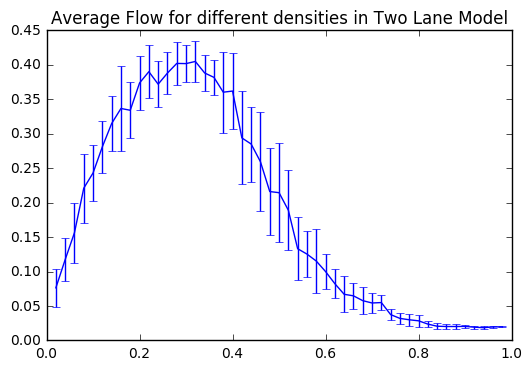

In [154]:
densities = sc.arange(0.02,1,.02)
flow = [ [NLaneTrafficSimulator(100, d, 5, .1, n_lanes = 2,verbose = False).run(n_steps = 200)  for i in range(20) ] for d in densities]
plt.errorbar(densities, [np.mean(this_flow) for this_flow in flow], [np.std(this_flow) for this_flow in flow] )
plt.title("Average Flow for different densities in Two Lane Model")
plt.show()

In [ ]:
densities = sc.arange(0.02,1,.02)
flow = [ [NLaneTrafficSimulator(100, d, 5, .1, n_lanes = 8,verbose = False).run(n_steps = 200)  for i in range(20) ] for d in densities]
plt.errorbar(densities, [np.mean(this_flow) for this_flow in flow], [np.std(this_flow) for this_flow in flow] )
plt.title("Average Flow for different densities in Three Lane Model")
plt.show()

In [ ]:
a = NLaneTrafficSimulator(road_len=100, p_car=.4, v_max=5, p_slow=.5)
a.run(5)

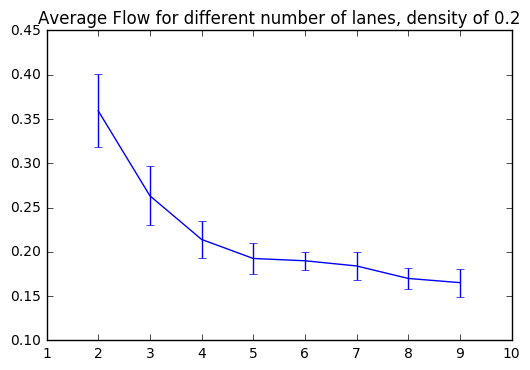

In [164]:
lanes_list = [2,3,4,5,6,7,8,9]
density = 0.2

flow = [ [NLaneTrafficSimulator(100, density, 5, .1, n_lanes = lanes,verbose = False).run(n_steps = 200)  for i in range(20) ] for lanes in lanes_list]
plt.errorbar(lanes_list, [np.mean(this_flow) for this_flow in flow], [np.std(this_flow) for this_flow in flow] )
plt.xlim(xmax = 10, xmin = 1)
plt.title("Average Flow for different number of lanes, density of 0.2")
plt.show()

### Appendix: Two Lane Simulator

Before developing the NLaneTrafficSimulator (which can be used for any number of lanes above 1) I made a simulator for two lanes. The implementation is slighthly different from that of the NLaneTrafficSimulator (less elegant as I repeat a lot of code for every lane), but should have the same behaviour as the NLaneTrafficSimulator with n_lanes = 2. I leave this class here for reference, even though the results used in my assignment come from the TrafficSimulator and NLaneTrafficSimulator classes only

In [ ]:
class TwoLaneTrafficSimulator:
    
    def __init__(self, road_len, p_car, v_max, p_slow, p_change = 1, verbose = True ):
        """
        Initialize traffic simulation:
        road_lend: length of the road (circumference)
        p_car: car density
        v_max: maximum speed
        p_slow: probability of slowing down 1 speed unit
        verbose: whether we want to display the states
        """      
        self.road_len = road_len
        self.v_max = v_max
        self.p_slow = p_slow
        self.verbose = verbose       
        self.p_change = p_change
        self.state1 = sc.zeros([road_len], int)
        self.state2 = sc.zeros([road_len], int)
        
        # All cars start at full speed
        for i in range(road_len):
            if rd.random() < p_car: self.state1[i] = self.v_max 
            else: self.state1[i] = -1    
            if rd.random() < p_car: self.state2[i] = self.v_max       
            else: self.state2[i] = -1
                
                
    def display(self):
        """
        Method for visualizing the state of the model
        """     
        print(''.join('.' if x == -1 else str(x) for x in self.state1))        
        print(''.join('.' if x == -1 else str(x) for x in self.state2))
        print
        
        
    def update(self):
        """
        Advances the simulation 1 timestep forward by doing the following on all cars:
         - Increase speed +1 if v smaller than v_max and distance to next vehicle > v+1
         - if distance to next car < v, slow down to d-1.
         - If speed > 0, randomly decrease speed by 1.
         - Display
         - Advance all cars v steps.
        """      
        flow = 0     
               
        copy_state1 = self.state1[:] 
        copy_state2 = self.state2[:]
        #check whether cars want to change
        for i, v in enumerate(self.state1):
            look = v+1
            d = 0
            #look front 
            while self.state1[(i + d) % self.road_len] == -1 and d <= look+1: d += 1                            
            if look >= d:
                d_other = 1
                #look front other lane
                while self.state2[(i + d_other) % self.road_len] == -1 and d_other <= look+1: d_other += 1 
                if d_other - 1 > look:
                    #look back other lane
                    d_back_other = 1
                    while self.state2[(i - d_back_other) % self.road_len] == -1 and d_back_other <= self.v_max+1: d_back_other += 1 
                    if d_back_other - 1 > self.v_max:
                        if rd.random() < self.p_change:
                            copy_state1[i] = -1
                            copy_state2[i] = v

        for i, v in enumerate(self.state2):
            d = 0
            look = v+1
            #look front
            while self.state2[(i + d) % self.road_len] == -1 and d <= look+1: d += 1                            
            if look >= d:
                d_other = 1
                #look front other lane
                while self.state1[(i + d_other) % self.road_len] == -1 and d_other <= look+1: d_other += 1 
                if d_other - 1 > look:
                    #look back other lane
                    d_back_other = 1
                    while self.state1[(i - d_back_other) % self.road_len] == -1 and d_back_other <= self.v_max+1: d_back_other += 1 
                    if d_back_other - 1 > self.v_max:
                        if rd.random() < self.p_change:
                            copy_state2[i] = -1
                            copy_state1[i] = v         
        self.state1 = copy_state1[:]
        self.state2 = copy_state2[:]
              
        for i, v in enumerate(self.state1):
            if v >= 0:
                #get distance to next car
                d = 1
                while self.state1[(i + d) % self.road_len] == -1: d += 1                    
                #update speeds
                if d > v + 1:
                    self.state1[i] = min(self.state1[i] + 1, self.v_max)
                else:
                    self.state1[i] = d - 1
                if self.state1[i] > 0 and rd.random() < self.p_slow:
                    self.state1[i] -= 1
                #Count flow
                if i + v > self.road_len: flow += 1
                               
        for i, v in enumerate(self.state2):
            if v >= 0:
                #get distance to next car
                d = 1
                while self.state2[(i + d) % self.road_len] == -1:
                    d += 1
                #update speeds
                if d > v + 1:
                    self.state2[i] = min(self.state2[i] + 1, self.v_max)
                else:
                    self.state2[i] = d - 1
                if self.state2[i] > 0 and rd.random() < self.p_slow:
                    self.state2[i] -= 1
                #Count flow
                if i + v > self.road_len: flow += 1        
                               
        #We display before moving the cars
        if self.verbose: self.display()                    
        copy_state = self.state1[:]
        i = 0
        while i < len(copy_state):
            v = copy_state[i]
            if v >= 0:
                self.state1[i] = -1
                i += v
                self.state1[i % self.road_len] = v
                i += 1
            else: 
                i+=1 
        
        copy_state = self.state2[:]
        i = 0
        while i < len(copy_state):
            v = copy_state[i]
            if v >= 0:
                self.state2[i] = -1
                i += v
                self.state2[i % self.road_len] = v
                i += 1
            else: 
                i+=1 
        
        return flow/2.0
    
    
    def run(self, n_steps = 100):
        if self.verbose: self.display()  
        flow_sum = 0.0
        for step in range(n_steps):
            flow_sum += self.update()
        return flow_sum / n_steps

In [148]:
a = TwoLaneTrafficSimulator(road_len=100, p_car=.1, v_max=5, p_slow=.5)
a.run(10)

5....5....5..............5.......5........5...............5..............5......5.............5...55
.5........5.....55.5...5.....5..........5.5..5....5.5..5....5....5..5..................5............

4....4....5......5.......4.......5........4.......5.......4......5.......4......5.............3...00
.4........5.....2..2...4.....5..........3....4......1..4....5.......4..................4............

....3....4.....4......4......4........5.......5........5......5.......5......4.......5...........0.1
.....5.........2..1..3.....4......5........3.....3...2.....4.....4......4..................4......1.

1......4.....5.....4......4......5.........5.......4........4......5.......5.....5........4......0..
..........4......1.1....4......5.......5......4.....2..2.......5.....5......4..................2...1

.2.........4......2....4......4.......4.........4......5........5.......5.......5.....4.......4.....
1.............5.....1.......4.......4.......5.....2...1..3..........5.....4.....5......

0.35

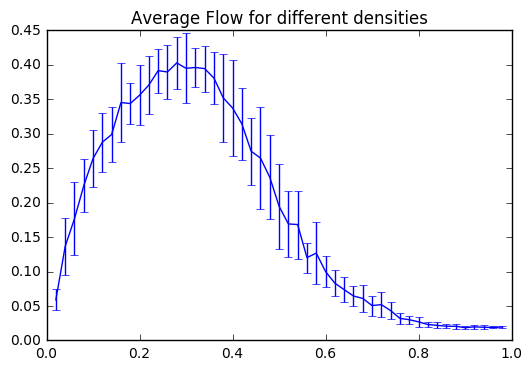

In [149]:
densities = sc.arange(0.02,1,.02)
flow = [ [TwoLaneTrafficSimulator(100, d, 5, .1, verbose = False).run(n_steps = 200)  for i in range(20) ] for d in densities]
plt.errorbar(densities, [np.mean(this_flow) for this_flow in flow], [np.std(this_flow) for this_flow in flow] )
plt.title("Average Flow for different densities")
plt.show()